# DISCRETIZACION DE VARIABLES NUMERICAS

In [79]:
#importando librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from libraries import *

In [80]:
#Cargando datos
data = pd.read_csv("./dataset.csv",delimiter=";")

In [81]:
data.nunique() #CANTIDAD DE VALORES DIFERENTES EN EL DATASET 

SOCIO                     8618
CUENTA                    8618
AGENCIA                      7
TIPO_SOCIO                   4
MONEDA                       1
PAGARE                    9734
PRODUCTO                    38
FEC_ULT_PAGO               411
TEA_INTERES                958
CUOTA_FIJA                7955
DIAS                         4
NOM_FRECUENCIA               4
EDAD                        65
ESTADO_CIVIL                 6
SEXO                         3
TIPO_VIVIENDA                3
OTORGA                    1223
RIESGO_INDIVIDUAL            5
NCUO_ATRASADAS             111
CUO_FALTANTES_VIGENTES     198
NDIAS_ATRASADOS            547
MONTO_PRESTAMO            1244
SALDO_PRESTAMO            8176
NRO_REPRO                   13
ANA_ORIGEN                 168
ANA_ACTUAL                  83
PROFESION                   80
OCUPACION                 2900
ACTIVIDAD_ECO               37
dtype: int64

In [82]:
data['MORA'] = np.where(data['NDIAS_ATRASADOS'] > data['DIAS'],1,0)

In [83]:
def min_max_per_category(data, category_column, value_column, labels):
    result = []
    for label in labels:
        min_value = data.query(f"{category_column} == {label}")[value_column].min().round()
        max_value = data.query(f"{category_column} == {label}")[value_column].max().round()
        result.append(f'{min_value}-{max_value}')
    return result

### TEA_INTERES

In [84]:
data.TEA_INTERES.nunique()

958

In [85]:
pd.__version__

'2.2.1'

In [86]:
labels = [i for i in range(0, 10)]
data['TEA_ANUAL'] = pd.qcut(data['TEA_INTERES'], 10, labels=labels)

In [87]:
data[['TEA_INTERES', 'TEA_ANUAL']]

,TEA_INTERES,TEA_ANUAL
0,69.39,3
1,101.22,5
2,45.93,1
3,100.08,4
4,125.22,5
...,...,...
9729,42.58,1
9730,42.58,1
9731,39.29,0
9732,79.56,3


In [88]:
min_max_list = min_max_per_category(data, 'TEA_ANUAL', 'TEA_INTERES', labels)

# Crear un diccionario de mapeo de etiquetas a valores concatenados
label_to_min_max = dict(zip(labels, min_max_list))

# Asignar los valores concatenados a la columna TEA_ANUAL
data['TEA_ANUAL'] = data['TEA_ANUAL'].map(label_to_min_max)

In [89]:
data[['TEA_INTERES', 'TEA_ANUAL']].sample(5)

,TEA_INTERES,TEA_ANUAL
6745,213.84,205.0-290.0
4981,156.33,126.0-157.0
2208,200.09,158.0-204.0
1104,42.58,41.0-49.0
829,302.31,290.0-500.0


### CUOTA_FIJA

In [90]:
labels = [i for i in range(0, 20)]
data['CUO_FIJA'] = pd.qcut(data['CUOTA_FIJA'], 20, labels=labels)

In [91]:
min_max_list = min_max_per_category(data, 'CUO_FIJA', 'CUOTA_FIJA', labels)

# Crear un diccionario de mapeo de etiquetas a valores concatenados
label_to_min_max = dict(zip(labels, min_max_list))

# Asignar los valores concatenados a la columna TEA_ANUAL
data['CUO_FIJA'] = data['CUO_FIJA'].map(label_to_min_max)

In [92]:
data['CUO_FIJA'] = data['CUO_FIJA'].fillna('0.0-20.0')

In [93]:
data[['CUOTA_FIJA', 'CUO_FIJA']].sample(5)

,CUOTA_FIJA,CUO_FIJA
6638,814.92,643.0-1070.0
2699,209.70,205.0-239.0
2609,60.00,59.0-78.0
848,234.65,205.0-239.0
7559,18.96,0.0-20.0


### EDAD

In [94]:
data.EDAD.describe()

count    9734.000000
mean       40.610849
std        11.918444
min        18.000000
25%        31.000000
50%        39.000000
75%        49.000000
max       121.000000
Name: EDAD, dtype: float64

In [95]:
labels = ['18-25','25-35','35-45','45-55','55-65','65+']
bins = [18, 25, 35, 45, 55, 65, np.inf]
data['RANGO_EDAD'] = pd.cut(data['EDAD'], bins=bins, labels=labels, include_lowest=True)

In [96]:
data[['EDAD', 'RANGO_EDAD']].sample(5)

,EDAD,RANGO_EDAD
4611,27,25-35
7673,26,25-35
9575,45,35-45
5324,39,35-45
5949,38,35-45


### NCUO_ATRASADAS

In [97]:
data.NCUO_ATRASADAS.describe()

count    9734.000000
mean        4.254263
std        11.417179
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       169.000000
Name: NCUO_ATRASADAS, dtype: float64

In [98]:
data.NCUO_ATRASADAS.value_counts()

NCUO_ATRASADAS
0      4670
1      1399
2       863
3       664
4       249
       ... 
110       1
146       1
140       1
136       1
64        1
Name: count, Length: 111, dtype: int64

<Axes: xlabel='NCUO_ATRASADAS', ylabel='Percent'>

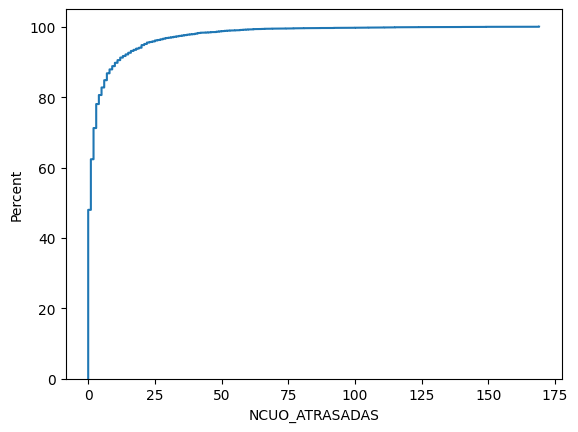

In [99]:
sns.ecdfplot(data, x='NCUO_ATRASADAS', stat='percent')

In [100]:
labels = ['1','2-3','4+']
bins = [0, 1, 3, np.inf]
data['CUO_ATRASADAS'] = pd.cut(data['NCUO_ATRASADAS'], bins=bins, labels=labels)

In [101]:
data[['NCUO_ATRASADAS', 'CUO_ATRASADAS']].sample(5)
data['CUO_ATRASADAS'] = data['CUO_ATRASADAS'].cat.add_categories(['0'])
data['CUO_ATRASADAS'] = data['CUO_ATRASADAS'].fillna('0')

In [102]:
data[['NCUO_ATRASADAS', 'CUO_ATRASADAS']].sample(5)

,NCUO_ATRASADAS,CUO_ATRASADAS
3887,2,2-3
957,0,0
8942,3,2-3
8628,3,2-3
1788,0,0


In [103]:
data.CUO_ATRASADAS.value_counts()

CUO_ATRASADAS
0      4670
4+     2138
2-3    1527
1      1399
Name: count, dtype: int64

### CUOTAS FALTANTES VIGENTES

In [104]:
data.CUO_FALTANTES_VIGENTES.describe()

count    9734.000000
mean       26.021677
std        31.744686
min         0.000000
25%         5.000000
50%        14.000000
75%        41.000000
max       495.000000
Name: CUO_FALTANTES_VIGENTES, dtype: float64

<Axes: xlabel='CUO_FALTANTES_VIGENTES', ylabel='Percent'>

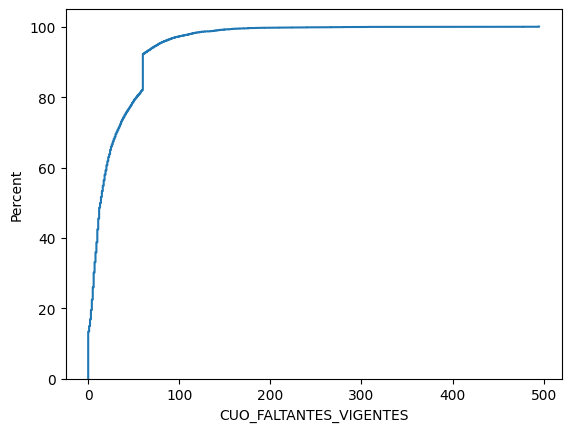

In [105]:
sns.ecdfplot(data, x='CUO_FALTANTES_VIGENTES', stat='percent')

In [106]:
labels = [i for i in range(0, 7)]
data['CUO_FALTANTES'] = pd.qcut(data['CUO_FALTANTES_VIGENTES'], 7, labels=labels)

In [107]:
min_max_list = min_max_per_category(data, 'CUO_FALTANTES', 'CUO_FALTANTES_VIGENTES', labels)

# Crear un diccionario de mapeo de etiquetas a valores concatenados
label_to_min_max = dict(zip(labels, min_max_list))

# Asignar los valores concatenados a la columna TEA_ANUAL
data['CUO_FALTANTES'] = data['CUO_FALTANTES'].map(label_to_min_max)

In [108]:
mask = data['CUO_FALTANTES_VIGENTES'] != 0
data['CUO_FALTANTES'] = data.loc[mask, 'CUO_FALTANTES'].ffill()

In [109]:
data['CUO_FALTANTES'] = data['CUO_FALTANTES'].cat.add_categories(['0'])
data['CUO_FALTANTES'] = data['CUO_FALTANTES'].fillna('0')

In [110]:
data.CUO_FALTANTES.value_counts()

CUO_FALTANTES
35-60     2001
7-11      1494
2-6       1479
19-34     1338
0         1305
12-18     1212
61-495     753
0-1        152
Name: count, dtype: int64

In [111]:
data.loc[data['CUO_FALTANTES'].isin(['2-6', '0-1']), 'CUO_FALTANTES'] = np.nan

In [112]:
data['CUO_FALTANTES'] = data['CUO_FALTANTES'].cat.add_categories(['1-6'])
data['CUO_FALTANTES'] = data['CUO_FALTANTES'].fillna('1-6')
data['CUO_FALTANTES'].replace(['0-1', '2-6'], np.nan, inplace = True);

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_9252\630524026.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CUO_FALTANTES'].replace(['0-1', '2-6'], np.nan, inplace = True);
C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_9252\630524026.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['CUO_FALTANTES'].

In [113]:
data[['CUO_FALTANTES_VIGENTES', 'CUO_FALTANTES']].sample(5)

,CUO_FALTANTES_VIGENTES,CUO_FALTANTES
1529,0,0
9347,37,35-60
5481,5,1-6
6862,10,7-11
2693,5,1-6


In [114]:
data.CUO_FALTANTES.value_counts()

CUO_FALTANTES
35-60     2001
1-6       1631
7-11      1494
19-34     1338
0         1305
12-18     1212
61-495     753
Name: count, dtype: int64

### NDIAS ATRASADOS

In [115]:
data.NDIAS_ATRASADOS.describe()

count    9734.000000
mean       82.099445
std       271.360152
min         0.000000
25%         0.000000
50%         0.000000
75%        29.000000
max      3458.000000
Name: NDIAS_ATRASADOS, dtype: float64

<Axes: xlabel='NDIAS_ATRASADOS', ylabel='Proportion'>

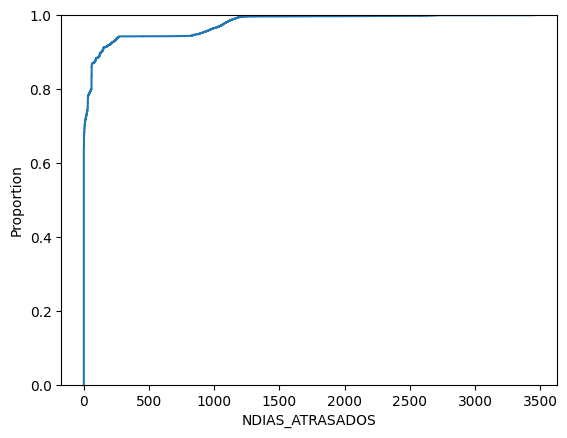

In [116]:
sns.ecdfplot(data=data,x='NDIAS_ATRASADOS')

In [117]:
labels = ['1-15','15-45','45-60','60-90','90+']
bins = [0, 15, 45, 60, 90, np.inf]
data['DIAS_ATRASADOS'] = pd.cut(data['NDIAS_ATRASADOS'], bins=bins, labels=labels)


In [118]:
data['DIAS_ATRASADOS'] = data['DIAS_ATRASADOS'].cat.add_categories(['0'])
data['DIAS_ATRASADOS'] = data['DIAS_ATRASADOS'].fillna('0')

In [119]:
data[['NDIAS_ATRASADOS', 'DIAS_ATRASADOS']].sample(5)

,NDIAS_ATRASADOS,DIAS_ATRASADOS
5608,0,0
9235,0,0
4064,0,0
564,211,90+
7702,0,0


### MONTO_PRESTAMO

In [120]:
data.MONTO_PRESTAMO.describe()

count      9734.000000
mean       5997.804119
std       11111.069155
min         200.000000
25%        1300.000000
50%        2735.000000
75%        5500.000000
max      450000.000000
Name: MONTO_PRESTAMO, dtype: float64

In [121]:
labels = [i for i in range(0, 15)]
data['M_PRESTAMO'] = pd.qcut(data['MONTO_PRESTAMO'], 15, labels=labels)

In [122]:
min_max_list = min_max_per_category(data, 'M_PRESTAMO', 'MONTO_PRESTAMO', labels)
label_to_min_max = dict(zip(labels, min_max_list))
data['M_PRESTAMO'] = data['M_PRESTAMO'].map(label_to_min_max)

In [123]:
data[['MONTO_PRESTAMO', 'M_PRESTAMO']].sample(10)

,MONTO_PRESTAMO,M_PRESTAMO
1974,1760.00,1510.0-2000.0
6463,2665.65,2300.0-3030.0
7571,2245.00,2210.0-2290.0
2142,16620.00,10125.0-20000.0
2852,2200.00,2000.0-2200.0
8095,6630.00,5510.0-7000.0
2386,3000.00,2300.0-3030.0
4529,3060.00,3035.0-3360.0
7623,2040.00,2000.0-2200.0
2020,1670.00,1510.0-2000.0


### SALDO_PRESTAMO

In [124]:
data.SALDO_PRESTAMO.describe()

count      9734.000000
mean       3476.077214
std        6708.486439
min           0.000000
25%         610.610000
50%        1450.330000
75%        3381.252500
max      177657.170000
Name: SALDO_PRESTAMO, dtype: float64

In [125]:
labels = [i for i in range(0, 9)]
data['S_PRESTAMO'] = pd.qcut(data['SALDO_PRESTAMO'], 9, labels=labels)

In [126]:
min_max_list = min_max_per_category(data, 'S_PRESTAMO', 'SALDO_PRESTAMO', labels)
label_to_min_max = dict(zip(labels, min_max_list))
data['S_PRESTAMO'] = data['S_PRESTAMO'].map(label_to_min_max)

In [127]:
data[['SALDO_PRESTAMO', 'S_PRESTAMO']].sample(10)

,SALDO_PRESTAMO,S_PRESTAMO
7398,3363.34,2460.0-3853.0
6164,1065.26,845.0-1160.0
4735,218.97,34.0-534.0
7040,0.00,0.0-31.0
2890,4860.63,3855.0-7832.0
4513,19286.44,7832.0-177657.0
520,205.43,34.0-534.0
6576,1210.99,1161.0-1721.0
9119,1747.06,1723.0-2460.0
3737,3295.76,2460.0-3853.0


In [128]:
data.S_PRESTAMO.value_counts()

S_PRESTAMO
845.0-1160.0       1086
0.0-31.0           1082
535.0-845.0        1082
2460.0-3853.0      1082
7832.0-177657.0    1082
34.0-534.0         1081
1723.0-2460.0      1081
3855.0-7832.0      1081
1161.0-1721.0      1077
Name: count, dtype: int64

In [129]:
mask = data['SALDO_PRESTAMO'] != 0
data['S_PRESTAMO'] = data.loc[mask, 'S_PRESTAMO'].ffill()
data['S_PRESTAMO'] = data['S_PRESTAMO'].cat.add_categories(['0'])
data['S_PRESTAMO'] = data['S_PRESTAMO'].fillna('0')

In [130]:
data.loc[data['S_PRESTAMO'].isin(['0.0-31.0', '34.0-534.0']), 'S_PRESTAMO'] = np.nan

In [131]:
data['S_PRESTAMO'] = data['S_PRESTAMO'].cat.add_categories(['1.0-534.0'])
data['S_PRESTAMO'] = data['S_PRESTAMO'].fillna('1.0-534.0')
data['S_PRESTAMO']=data['S_PRESTAMO'].replace(['0.0-31.0', '34.0-534.0'], np.nan)

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_9252\3447588833.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['S_PRESTAMO']=data['S_PRESTAMO'].replace(['0.0-31.0', '34.0-534.0'], np.nan)


In [132]:
data[['SALDO_PRESTAMO','S_PRESTAMO']].sample(15)

,SALDO_PRESTAMO,S_PRESTAMO
2865,8898.56,7832.0-177657.0
4589,0.00,0
4418,188.46,1.0-534.0
2661,3854.80,3855.0-7832.0
6641,2002.94,1723.0-2460.0
6003,0.00,0
1943,1160.00,845.0-1160.0
3651,544.72,535.0-845.0
4921,114.96,1.0-534.0
137,491.42,1.0-534.0


In [133]:
data.S_PRESTAMO.value_counts()

S_PRESTAMO
1.0-534.0          1112
845.0-1160.0       1086
535.0-845.0        1082
2460.0-3853.0      1082
7832.0-177657.0    1082
1723.0-2460.0      1081
3855.0-7832.0      1081
1161.0-1721.0      1077
0                  1051
Name: count, dtype: int64

### NRO_REPROGRAMACIONES

In [134]:
data.NRO_REPRO.describe()

count    3823.000000
mean        2.191734
std         1.489582
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        13.000000
Name: NRO_REPRO, dtype: float64

In [135]:
data['IS_REPRO'] = data['NRO_REPRO'].apply(lambda x: 1 if x >= 1 else 0)

### RESUMEN

In [136]:
data.sample(10)

,SOCIO,CUENTA,AGENCIA,TIPO_SOCIO,MONEDA,PAGARE,PRODUCTO,FEC_ULT_PAGO,TEA_INTERES,CUOTA_FIJA,...,MORA,TEA_ANUAL,CUO_FIJA,RANGO_EDAD,CUO_ATRASADAS,CUO_FALTANTES,DIAS_ATRASADOS,M_PRESTAMO,S_PRESTAMO,IS_REPRO
8421,"LAZARINOS JOBE, SUSANA",26722,98,1,S,06-0000123-24,PAGA DIARIO (CT),2024-04-26,113.87,69.57,...,0,100.0-125.0,59.0-78.0,55-65,2-3,35-60,0,2300.0-3030.0,2460.0-3853.0,0
5239,"NINA ROQUE, NAY RUTH",27681,3,1,S,03-0010605-24,PAGA DIARIO (CT),2024-04-08,100.08,58.33,...,0,80.0-100.0,49.0-59.0,25-35,0,0,0,2000.0-2200.0,0,0
3258,"PUMA GUZMAN, PAULINA",17740,2,1,S,02-0010024-24,MAS INCLUSIVO SEMANAL,2024-04-29,200.09,141.31,...,0,158.0-204.0,118.0-145.0,35-45,0,1-6,0,200.0-1015.0,535.0-845.0,0
5512,"HERMOZA QUISPE, VALENTINA",26403,3,1,S,03-0010937-24,SEMANAL MICRO,2024-04-29,100.08,154.04,...,0,80.0-100.0,145.0-174.0,35-45,1,7-11,1-15,2000.0-2200.0,1161.0-1721.0,0
2716,"OLLACHICA MAMANI, RODRIGO MISAEL",16095,1,1,S,01-016335-21,CREDITO DIGITAL,2022-09-02,58.27,163.41,...,1,49.0-60.0,145.0-174.0,18-25,4+,1-6,90+,1020.0-1100.0,535.0-845.0,0
945,"BEDIA BARRETO, AYDEE",24209,1,1,S,01-0025051-23,MAS INCLUSIVO,2024-04-29,213.84,150.45,...,0,205.0-290.0,145.0-174.0,25-35,0,12-18,0,2000.0-2200.0,1723.0-2460.0,1
1087,"SOTELO GOMEZ, MARYNILDA",27046,1,1,S,01-0025424-23,MAS VELOZ,2024-04-30,51.11,349.86,...,0,49.0-60.0,293.0-364.0,18-25,0,1-6,0,3035.0-3360.0,1723.0-2460.0,0
4277,"CASTILLO HOLGADO, MARLENI",21932,2,1,S,02-009249-23,PAGA DIARIO (CT),2024-04-30,101.22,261.11,...,0,100.0-125.0,240.0-293.0,55-65,0,35-60,0,7001.0-10120.0,3855.0-7832.0,1
6144,"HUARCA OBLITAS, GABRIELA SHELEY",29409,4,1,S,04-0003636-24,MAS INCLUSIVO,2024-04-30,493.60,36.23,...,0,290.0-500.0,35.0-40.0,18-25,0,19-34,0,1110.0-1130.0,845.0-1160.0,0
8772,"NEYRA VILCA, HUGO",27812,1,1,S,06-0001598-24,MAS INCLUSIVO,2024-04-12,405.11,49.22,...,0,290.0-500.0,49.0-59.0,25-35,2-3,12-18,0,1135.0-1510.0,535.0-845.0,1


In [137]:
data.drop(['TEA_INTERES','CUOTA_FIJA','EDAD','NCUO_ATRASADAS','CUO_FALTANTES_VIGENTES','NDIAS_ATRASADOS','MONTO_PRESTAMO','SALDO_PRESTAMO','NRO_REPRO'], axis=1, inplace = True)


In [138]:
data.rename(index=str, columns={
    'TEA_ANUAL': 'TEA_INTERES',
    'CUO_FIJA': 'CUOTA_FIJA',
    'RANGO_EDAD': 'EDAD',
    'CUO_ATRASADAS':'NCUO_ATRASADAS',
    'CUO_FALTANTES':'CUO_FALTANTES_VIGENTES',
    'DIAS_ATRASADOS':'NDIAS_ATRASADOS',
    'M_PRESTAMO':'MONTO_PRESTAMO',
    'S_PRESTAMO':'SALDO_PRESTAMO'
},inplace=True)

In [139]:
data['TEA_INTERES'] = data['TEA_INTERES'].astype('object')
data['CUOTA_FIJA'] = data['CUOTA_FIJA'].astype('object')
data['EDAD'] = data['EDAD'].astype('object')
data['NCUO_ATRASADAS'] = data['NCUO_ATRASADAS'].astype('object')
data['CUO_FALTANTES_VIGENTES'] = data['CUO_FALTANTES_VIGENTES'].astype('object')
data['NDIAS_ATRASADOS'] = data['NDIAS_ATRASADOS'].astype('object')
data['MONTO_PRESTAMO'] = data['MONTO_PRESTAMO'].astype('object')
data['SALDO_PRESTAMO'] = data['SALDO_PRESTAMO'].astype('object')

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9734 entries, 0 to 9733
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   SOCIO                   9734 non-null   object
 1   CUENTA                  9734 non-null   int64 
 2   AGENCIA                 9734 non-null   int64 
 3   TIPO_SOCIO              9734 non-null   int64 
 4   MONEDA                  9734 non-null   object
 5   PAGARE                  9734 non-null   object
 6   PRODUCTO                9734 non-null   object
 7   FEC_ULT_PAGO            9734 non-null   object
 8   DIAS                    9734 non-null   int64 
 9   NOM_FRECUENCIA          9734 non-null   object
 10  ESTADO_CIVIL            9734 non-null   object
 11  SEXO                    9734 non-null   object
 12  TIPO_VIVIENDA           9734 non-null   object
 13  OTORGA                  9734 non-null   object
 14  RIESGO_INDIVIDUAL       9734 non-null   object
 15  ANA_ORIGE

In [141]:
data.sample(10)

,SOCIO,CUENTA,AGENCIA,TIPO_SOCIO,MONEDA,PAGARE,PRODUCTO,FEC_ULT_PAGO,DIAS,NOM_FRECUENCIA,...,MORA,TEA_INTERES,CUOTA_FIJA,EDAD,NCUO_ATRASADAS,CUO_FALTANTES_VIGENTES,NDIAS_ATRASADOS,MONTO_PRESTAMO,SALDO_PRESTAMO,IS_REPRO
8297,"ALATA MESCCO, JHUNIOR",22354,5,1,S,05-004985-24,PAGA DIARIO (CT),2024-04-30,1,DIAS,...,0,80.0-100.0,29.0-35.0,25-35,0,61-495,0,3370.0-4500.0,2460.0-3853.0,0
571,"AGUIRRE GARCIA, ANA MARIA",22606,1,1,S,01-0023593-23,MAS INCLUSIVO,2023-12-30,1,DIAS,...,1,158.0-204.0,78.0-100.0,35-45,4+,19-34,90+,1510.0-2000.0,1161.0-1721.0,1
4985,"CHACMANI NOA, SOFIA",17797,3,1,S,03-0008049-23,MAS INCLUSIVO,2024-04-06,1,DIAS,...,0,126.0-157.0,29.0-35.0,45-55,0,0,0,2300.0-3030.0,0,0
7810,"ENCISO CARPIO, ALESSANDRA IVONN",26781,5,1,S,05-004036-23,CAMPAÑA,2024-04-30,30,MESES,...,1,0.0-41.0,473.0-642.0,25-35,2-3,19-34,45-60,7001.0-10120.0,7832.0-177657.0,0
7666,"RIOZEWSKY ESCALANTE, BRABAHAN",25810,5,1,S,05-003473-23,PAGA DIARIO (CT),2023-09-30,1,DIAS,...,1,100.0-125.0,20.0-23.0,45-55,2-3,35-60,15-45,1110.0-1130.0,535.0-845.0,1
1338,"RIVERA ROMERO, DANIEL MANUEL",27607,1,1,S,01-0025906-23,RAPIDIN (CT),2024-03-30,30,MESES,...,1,126.0-157.0,293.0-364.0,18-25,2-3,7-11,60-90,2210.0-2290.0,1723.0-2460.0,0
42,"GONZALES BONILLA, LUISANA",26833,1,1,S,01-0000595-23,MAS INCLUSIVO,2024-04-30,1,DIAS,...,0,205.0-290.0,40.0-49.0,55-65,4+,1-6,0,1110.0-1130.0,1.0-534.0,1
7669,"HUAMAN AYQUIPA, ANGGIE LUBETH",24129,5,1,S,05-003486-23,RAPIDIN (CT),2024-03-30,15,QUINCENAS,...,0,41.0-49.0,59.0-78.0,18-25,0,19-34,0,3370.0-4500.0,1161.0-1721.0,1
4084,"HUAMAN MISME, ALFREDO",22591,2,1,S,02-008602-23,PAGA DIARIO (CT),2024-04-17,1,DIAS,...,0,60.0-80.0,23.0-29.0,45-55,1,61-495,0,5510.0-7000.0,2460.0-3853.0,1
4598,"CHUQUIPALLA CRUZ, YENI SANDRA",22322,2,1,S,02-009762-24,SEMANAL MICRO,2024-04-26,7,SEMANAS,...,0,80.0-100.0,473.0-642.0,25-35,0,0,0,2000.0-2200.0,0,0


### RESPECTO A LA MORA

#### TEA INTERES

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_9252\4138738797.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


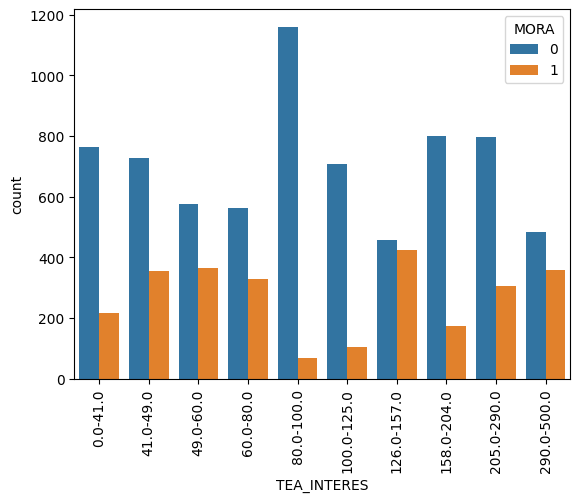

In [142]:
x = sns.countplot(data, x='TEA_INTERES', hue='MORA',order = ordenar(list(set(data['TEA_INTERES'].unique()))))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

In [143]:
data.CUOTA_FIJA.value_counts()

CUOTA_FIJA
0.0-20.0          492
35.0-40.0         488
100.0-118.0       488
1071.0-13378.0    487
23.0-29.0         487
240.0-293.0       487
174.0-205.0       487
59.0-78.0         487
473.0-642.0       487
643.0-1070.0      486
205.0-239.0       486
365.0-472.0       486
29.0-35.0         486
49.0-59.0         486
20.0-23.0         486
78.0-100.0        486
145.0-174.0       486
293.0-364.0       486
40.0-49.0         485
118.0-145.0       485
Name: count, dtype: int64

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9734 entries, 0 to 9733
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   SOCIO                   9734 non-null   object
 1   CUENTA                  9734 non-null   int64 
 2   AGENCIA                 9734 non-null   int64 
 3   TIPO_SOCIO              9734 non-null   int64 
 4   MONEDA                  9734 non-null   object
 5   PAGARE                  9734 non-null   object
 6   PRODUCTO                9734 non-null   object
 7   FEC_ULT_PAGO            9734 non-null   object
 8   DIAS                    9734 non-null   int64 
 9   NOM_FRECUENCIA          9734 non-null   object
 10  ESTADO_CIVIL            9734 non-null   object
 11  SEXO                    9734 non-null   object
 12  TIPO_VIVIENDA           9734 non-null   object
 13  OTORGA                  9734 non-null   object
 14  RIESGO_INDIVIDUAL       9734 non-null   object
 15  ANA_ORIGE

In [145]:
data['CUOTA_FIJA'].isna().sum()

0

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_9252\3478352474.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


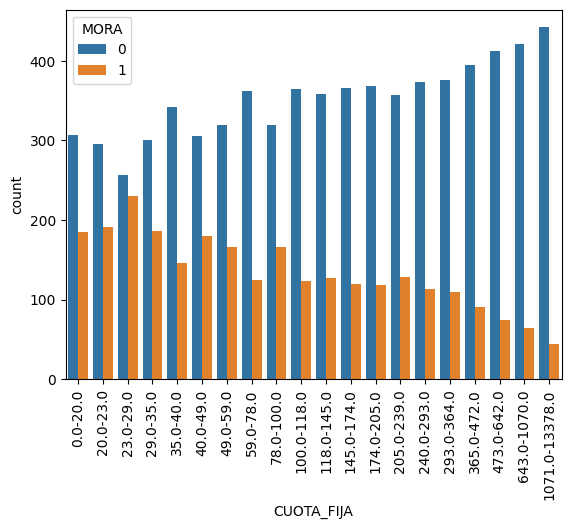

In [146]:
x = sns.countplot(data, x='CUOTA_FIJA', hue='MORA', order = ordenar(list(set(data['CUOTA_FIJA'].unique()))))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

#### NCUO_ATRASADAS

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_9252\2503534600.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


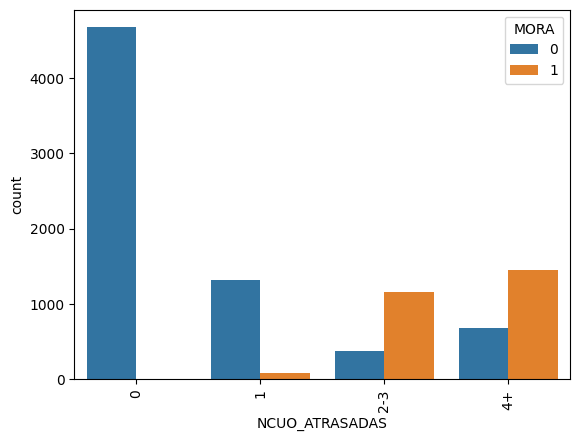

In [147]:
x = sns.countplot(data, x='NCUO_ATRASADAS', hue='MORA',order=sorted(data['NCUO_ATRASADAS'].unique()))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

#### CUO_FALTANTES_VIGENTES

In [148]:
data.CUO_FALTANTES_VIGENTES.value_counts()

CUO_FALTANTES_VIGENTES
35-60     2001
1-6       1631
7-11      1494
19-34     1338
0         1305
12-18     1212
61-495     753
Name: count, dtype: int64

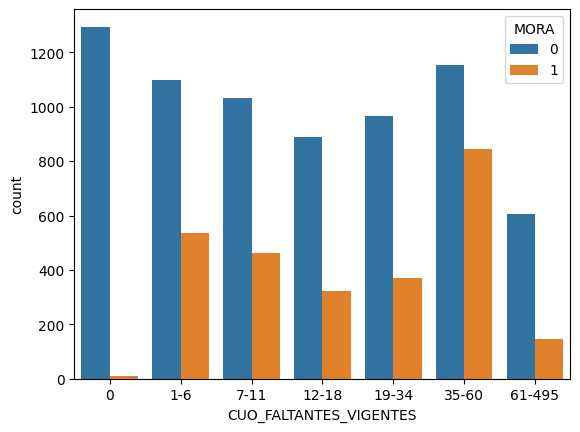

In [149]:
x = sns.countplot(data, x='CUO_FALTANTES_VIGENTES', hue='MORA',order=ordenar(list(set(data['CUO_FALTANTES_VIGENTES'].unique()))))


#### NDIAS_ATRASADOS

In [150]:
data.NDIAS_ATRASADOS.value_counts()

NDIAS_ATRASADOS
0        6281
90+      1180
1-15      754
45-60     688
15-45     658
60-90     173
Name: count, dtype: int64

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_9252\618374493.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


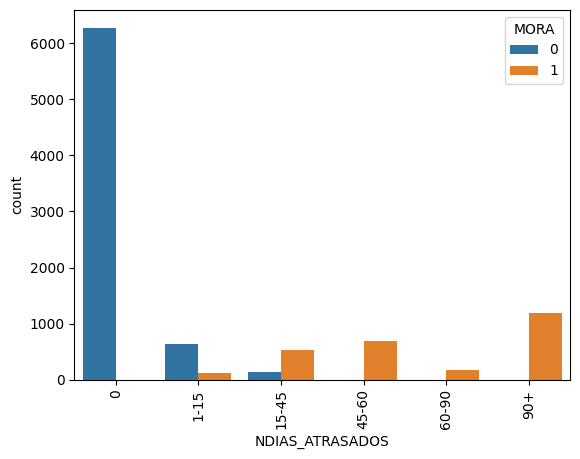

In [151]:
x = sns.countplot(data, x='NDIAS_ATRASADOS', hue='MORA',order=sorted(data['NDIAS_ATRASADOS'].unique()))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

#### MONTO_PRESTAMO

In [152]:
data.MONTO_PRESTAMO.value_counts()

MONTO_PRESTAMO
4510.0-5500.0       869
200.0-1015.0        827
2000.0-2200.0       757
1510.0-2000.0       746
2300.0-3030.0       683
3035.0-3360.0       668
7001.0-10120.0      666
10125.0-20000.0     650
20001.0-450000.0    628
1135.0-1510.0       612
1110.0-1130.0       610
3370.0-4500.0       603
1020.0-1100.0       551
2210.0-2290.0       443
5510.0-7000.0       421
Name: count, dtype: int64

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_9252\1050183195.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


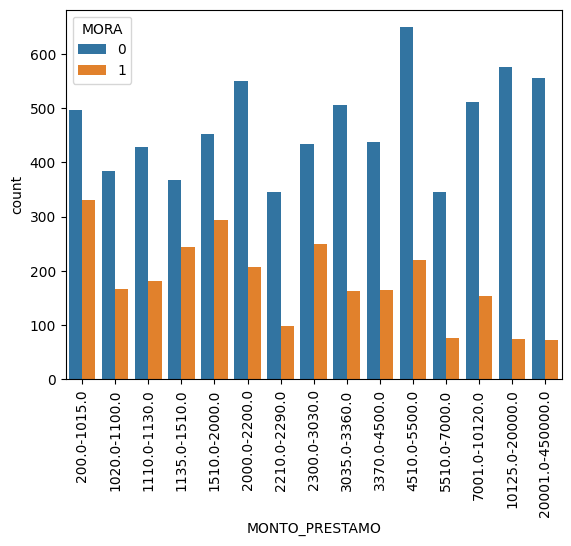

In [153]:
x = sns.countplot(data, x='MONTO_PRESTAMO', hue='MORA',order = ordenar(list(set(data['MONTO_PRESTAMO'].unique()))))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

#### SALDO_PRESTAMO

In [154]:
data.SALDO_PRESTAMO.value_counts()

SALDO_PRESTAMO
1.0-534.0          1112
845.0-1160.0       1086
535.0-845.0        1082
7832.0-177657.0    1082
2460.0-3853.0      1082
1723.0-2460.0      1081
3855.0-7832.0      1081
1161.0-1721.0      1077
0                  1051
Name: count, dtype: int64

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_9252\84685381.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


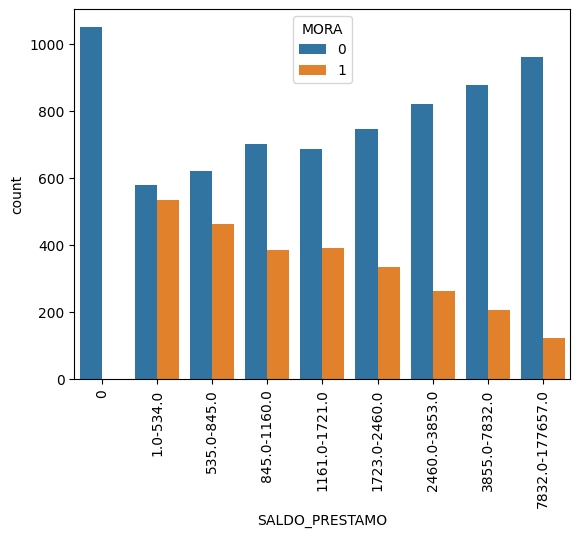

In [155]:
x = sns.countplot(data, x='SALDO_PRESTAMO', hue='MORA',order = ordenar(list(set(data['SALDO_PRESTAMO'].unique()))))
x.set_xticklabels(x.get_xticklabels(), rotation=90);